# Medical Insurance Price Prediction

In [32]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [123]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [124]:
df[['sex' , 'smoker']].isnull().sum()

sex       0
smoker    0
dtype: int64

In [125]:
df['sex'] = df['sex'].map({'male':0,'female':1})
df['region']=df['region'].map({'northwest':0,'northeast':1 ,'southeast':2 ,'southwest':3})

df['smoker'] =df['smoker'].map({'yes':1 , 'no':0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [126]:
df.info()
df['sex'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


0    676
1    662
Name: sex, dtype: int64

In [127]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [128]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

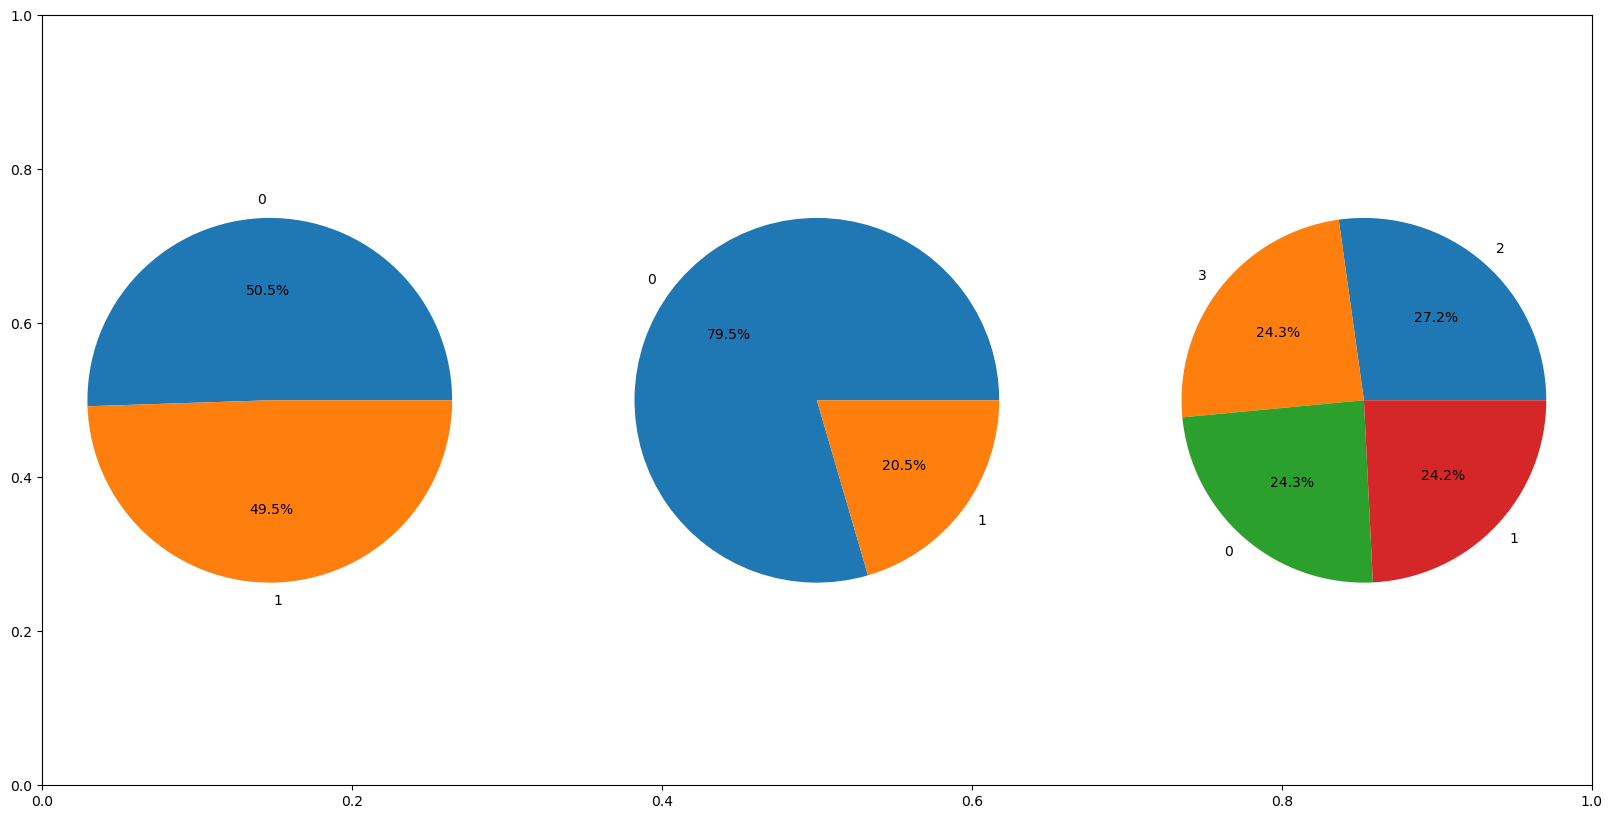

In [129]:
col = ['sex','smoker','region']
plt.subplots(figsize=(20,10))

for i,c in enumerate(col): 
    plt.subplot(1,3,i+1)
    x = df[c].value_counts()
    plt.pie(x.values,labels=x.index,autopct='%1.1f%%')

plt.show()

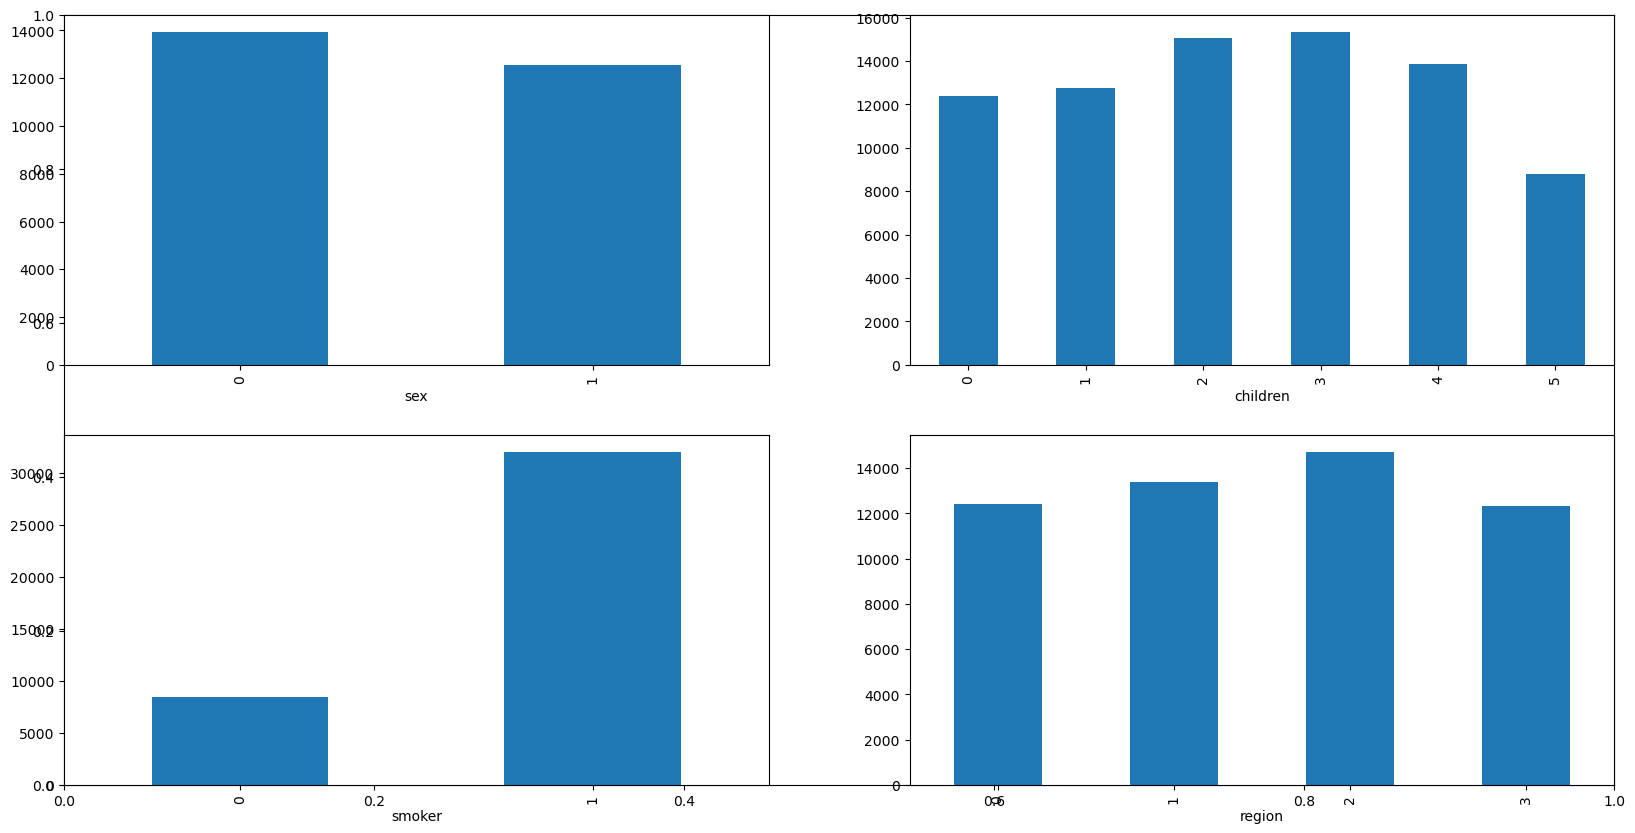

In [130]:
col = ['sex','children','smoker','region']

plt.subplots(figsize=(20,10))
for i,c in enumerate(col):
    plt.subplot(2,2,i+1)
    df.groupby(c)['charges'].mean().astype(float).plot.bar()
plt.show()

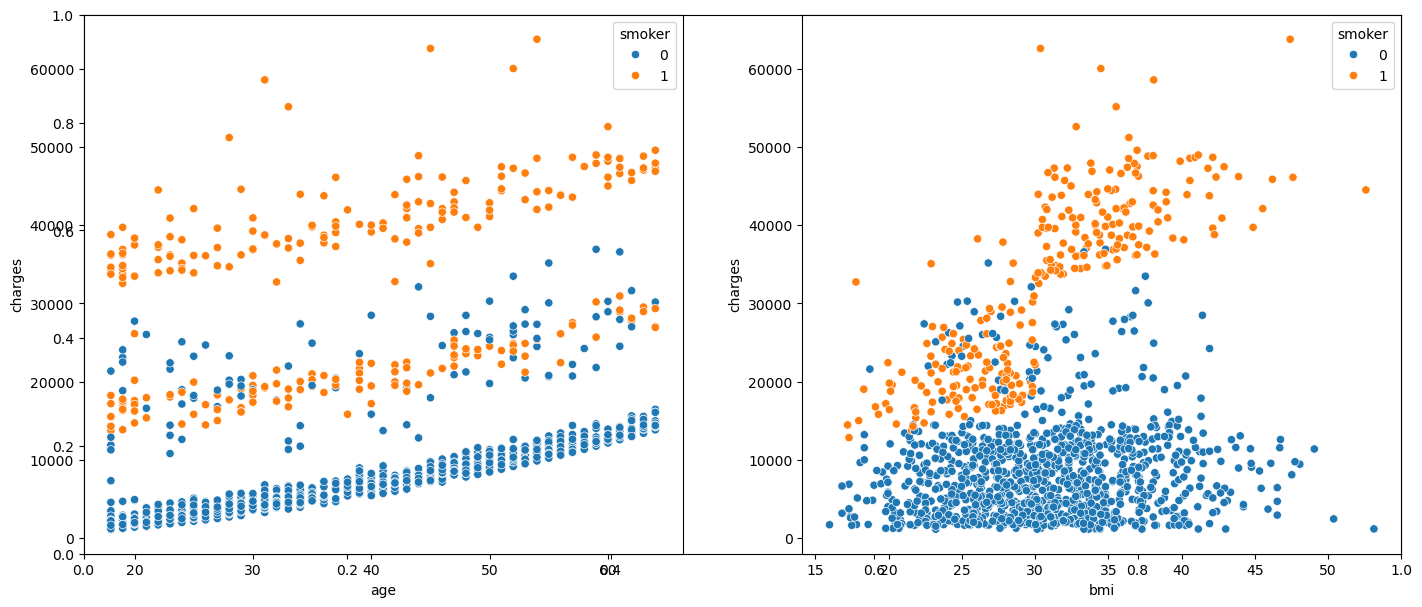

In [131]:
col = ['age','bmi']

plt.subplots(figsize=(17,7))
for i,c in enumerate(col): 
    plt.subplot(1,2,i+1)
    sns.scatterplot(data = df , x = c,y='charges',hue='smoker')

plt.show()

<Axes: ylabel='age'>

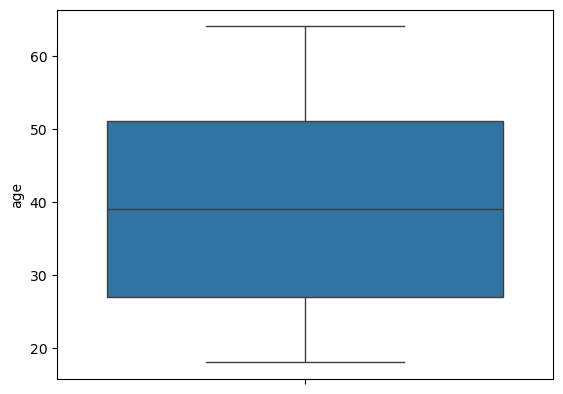

In [132]:
# Data Preprocessing 

df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

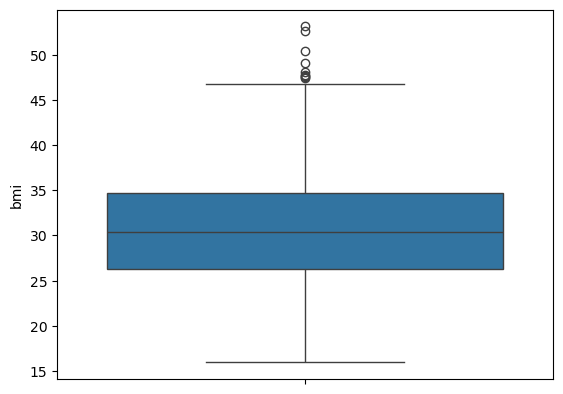

In [133]:
sns.boxplot(df['bmi'])

In [134]:
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)

iqr = q3-q1 

low_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr 

print(low_bound)
print(upper_bound)



13.674999999999994
47.31500000000001


<Axes: ylabel='bmi'>

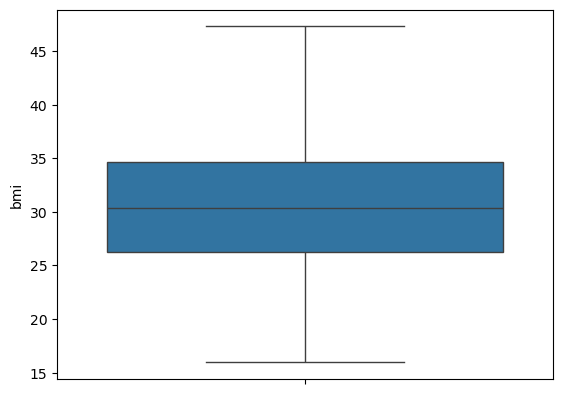

In [136]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb = ArbitraryOutlierCapper(min_capping_dict = {'bmi':13.6749} , max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [137]:
# Data wrangling

print(clean_df['bmi'].skew())
print(df['age'].skew())

0.15714074884049561
0.054780773126998195


In [138]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


In [149]:
# Model Development 

X = df.drop(['charges'],axis = 1)
Y = df[['charges']]

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

l1 =[]  #training data ka score
l2 = []  #testing data ka score
l3 = [] #cvs
cvs = 0

for i in range(40,50): 
    xtrain , xtest,ytrain ,ytest = train_test_split(X,Y,test_size=0.2,random_state=i)

    lrmodel = LinearRegression()
    lrmodel.fit(xtrain , ytrain)

    l1.append(lrmodel.score(xtrain , ytrain))
    l2.append(lrmodel.score(xtest , ytest))
    cvs = (cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)

df1 = pd.DataFrame({'train acc' : l1 , 'test acc' : l2 , 'cvs':l3})
df1


,train acc,test acc,cvs
0,0.741659,0.778409,0.74707
1,0.756401,0.706267,0.74707
2,0.729542,0.806239,0.74707
3,0.754260,0.732791,0.74707
4,0.742966,0.779591,0.74707
5,0.753281,0.731769,0.74707
6,0.741261,0.776456,0.74707
7,0.731940,0.796173,0.74707
8,0.751915,0.741742,0.74707
9,0.756348,0.722565,0.74707


In [152]:
xtrain , xtest,ytrain ,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

lrmodel = LinearRegression()
lrmodel.fit(xtrain , ytrain)
print(lrmodel.score(xtrain , ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel , X , Y , cv = 5,).mean())

0.7295415541376445
0.8062391115570589
0.7470697972809901


In [159]:
from sklearn.metrics import r2_score 

svr = SVR()
svr.fit(xtrain , ytrain)
y_pred1 = svr.predict(xtrain)
y_pred2 = svr.predict(xtest)
print(r2_score(ytrain,y_pred1))
print(r2_score(ytest,y_pred2))
print(cross_val_score(svr,X,Y,cv=5,).mean())


-0.10151474302536445
-0.1344454720199666
-0.10374591327267262


In [161]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(xtrain,ytrain)

y_pred1 = rfr.predict(xtrain)
y_pred2 = rfr.predict(xtest)

print(r2_score(ytrain,y_pred1))
print(r2_score(ytest,y_pred2))
print(cross_val_score(rfr,X,Y,cv=5,).mean())

0.9738163260247533
0.8819423353068565
0.8363637309718952


In [166]:
from sklearn.model_selection import GridSearchCV

gdcv = RandomForestRegressor(random_state = 42)
param_grid = {
    'n_estimators':[10,40,50,98,100,120,150]
}

grid = GridSearchCV(gdcv,param_grid,scoring='r2',cv=5)
grid.fit(xtrain , ytrain)

print('Hyper Parameter tuning: ')
 
print(grid.best_params_)

rfr = RandomForestRegressor(random_state=42,n_estimators=120) 
rfr.fit(xtrain,ytrain)

y_pred1 = rfr.predict(xtrain)
y_pred2 = rfr.predict(xtest)

print(r2_score(ytrain,y_pred1))
print(r2_score(ytest,y_pred2))
print(cross_val_score(rfr,X,Y,cv=5,).mean())




Hyper Parameter tuning: 
{'n_estimators': 120}
0.9746383984429655
0.8822009842175969
0.8367438097052858


In [167]:
gb = GradientBoostingRegressor()
gb.fit(xtrain , ytrain)
y_pred1 = gb.predict(xtrain)
y_pred2 = gb.predict(xtest)

print(r2_score(ytrain,y_pred1))
print(r2_score(ytest,y_pred2))
print(cross_val_score(gb,X,Y,cv=5,).mean())

0.8931345821166041
0.9042684150797644
0.8551747023424682


In [170]:
from sklearn.model_selection import GridSearchCV

estimator = GradientBoostingRegressor()
param_grid={
    'n_estimators' : [10,15,19,20,21,50],
    'learning_rate' : [0.1,0.19,0.2,0.21,0.8,1]
}

gscv = GridSearchCV(estimator,param_grid,scoring='r2',cv=5)
gscv.fit(xtrain , ytrain)

print('Hyper Parameter tunning : ')

print(gscv.best_params_)


gb = GradientBoostingRegressor(n_estimators=19 , learning_rate=0.2)
gb.fit(xtrain , ytrain)
y_pred1 = gb.predict(xtrain)
y_pred2 = gb.predict(xtest)

print(r2_score(ytrain,y_pred1))
print(r2_score(ytest,y_pred2))
print(cross_val_score(gb,X,Y,cv=5,).mean())


Hyper Parameter tunning : 
{'learning_rate': 0.2, 'n_estimators': 19}
0.8682397447116927
0.9017109716082661
0.8606041910125791


In [172]:
xgb = XGBRegressor()
xgb.fit(xtrain,ytrain)

y_pred1 = xgb.predict(xtrain)
y_pred2 = xgb.predict(xtest)

print(r2_score(ytrain , y_pred1))
print(r2_score(ytest,y_pred2))
print(cross_val_score(xgb,X,Y,cv=5,).mean())

0.9954123497009277
0.8548938035964966
0.8081253051757813


In [174]:
from sklearn.model_selection import GridSearchCV

estimator = XGBRegressor()
param_grid={
    'n_estimators' : [10,15,20,40,50], 
    'max_depth':[3,4,5], 
    'gamma':[0,0.15,0.3,0.5,1]
}

gscv = GridSearchCV(estimator,param_grid,scoring='r2',cv=5)
print('HyperParameterTuning-->')
gscv.fit(xtrain , ytrain)
print(gscv.best_params_)


xgb = XGBRegressor(gamma=0,max_depth = 3, n_estimators = 15)
xgb.fit(xtrain , ytrain)

y_pred1 = xgb.predict(xtrain) 
y_pred2= xgb.predict(xtest)

print(r2_score(ytrain, y_pred1))
print(r2_score(ytest, y_pred2))
print(cross_val_score(xgb,X,Y,cv=5,).mean())

HyperParameterTuning-->
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.869317352771759
0.9022461175918579
0.8607115387916565


In [181]:
final=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
final

,Importance
age,0.136687
sex,0.007273
bmi,0.216829
children,0.023357
smoker,0.599381
region,0.016472


In [184]:
important_features=feats[feats['Importance']>0.017]
important_features

,Importance
age,0.136687
bmi,0.216829
children,0.023357
smoker,0.599381


In [191]:
# Final model --> 


# df.drop(df[['sex','region']],axis =1 , inplace=True)
Xf = df.drop(df[['charges']],axis =1 )
X = df.drop(df[['charges']],axis =1)

xtrain , xtest , ytrain ,ytest = train_test_split(Xf,Y ,test_size=0.2,random_state=42)

final_model = XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
final_model.fit(xtrain ,ytrain)
y_pred1 = final_model.predict(xtrain)
y_pred2 = final_model.predict(xtest)

print('Training Acc: ', r2_score(ytrain , y_pred1))
print('Testing acc : ',  r2_score(ytest , y_pred2))
print('CV score :' ,cross_val_score(final_model,X,Y,cv=5,).mean())

Training Acc:  0.8691051602363586
Testing acc :  0.9007425308227539
CV score : 0.8606266975402832


In [192]:
# Predict new Data ->


new_Data = pd.DataFrame({'age':19,'sex':'male','bmi':27.9 , 'children':0,'smoker':'yes',
                        'region':'northeast'},index = [0])

new_Data['smoker']=new_Data['smoker'].map({'yes':1,'no':0})
new_Data=new_Data.drop(new_Data[['sex','region']],axis=1)
final_model.predict(new_Data)

array([18035.828], dtype=float32)